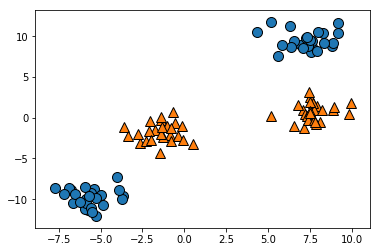

In [2]:
%matplotlib inline
import numpy
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import mglearn

X,y = make_blobs(centers=4, random_state=8)
y=y%2

mglearn.discrete_scatter(X[:,0], X[:,1],y)

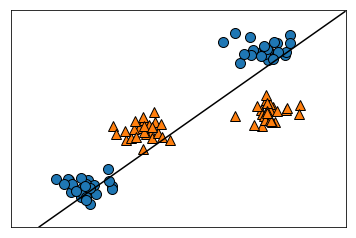

In [7]:
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1],y)

Text(0.5,0,'признак 1**2')

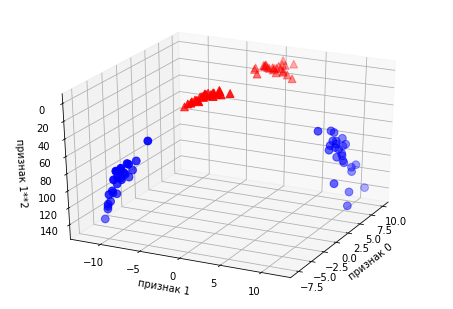

In [18]:
#добавим новый признак feature1**2
import numpy as np
X_new = np.hstack([X, X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
import matplotlib.pyplot as plt
figure=plt.figure()

ax=Axes3D(figure, elev=-152, azim=-26)

mask=y==0 #сначала размещаем точки с y==0, затем c y==1

ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2], c='b',cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2], c='r',marker='^',cmap=mglearn.cm2, s=60)

ax.set_xlabel("признак 0")
ax.set_ylabel("признак 1")
ax.set_zlabel("признак 1**2")

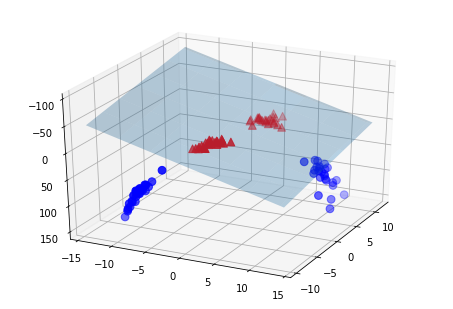

In [21]:
#строим плоскость для отделения классов друг от друга

linear_svm_3d=LinearSVC().fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure=plt.figure()
ax=Axes3D(figure, elev=-152, azim=-26)
xx=np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2,50)

XX, YY = np.meshgrid(xx,yy)
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/coef[2]
ax.plot_surface(XX,YY,ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2], c='b',cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2], c='r',marker='^',cmap=mglearn.cm2, s=60)

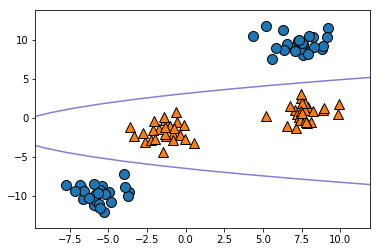

In [24]:
ZZ=YY**2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contour(XX,YY, dec.reshape(XX.shape), levels=[dec.min(),0,dec.max()],cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)